# Fake News

This is code for predicting fake news.

https://www.kaggle.com/c/fake-news

Private accuracy: 0.98873<br>
Public accuacy: 0.98782

I got a 0.98782 public accracy when uploaded to kaggle.com (Which i suspect is the maximum possible because it is exaclty the same as the top one on the leaderboard)

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.options.display.max_colwidth = 1000

data = pd.read_csv('train.csv', delimiter = ',')
test = pd.read_csv('test.csv', delimiter = ',')

#data = data[:1000]
#test = test[:1000]

https://docs.python.org/3/howto/regex.html

## Text Preprocessing:

In [68]:
import regex
import re

test=test.fillna('')
data=data.fillna('')

def clean_data(data):
    # Remove rows with cyrillic text
    print("before non-latin removal: ", data.shape)
    filter = []
    for index, row in data.iterrows():
        reg = regex.match('^\p{Latin}',row['text'])
        if reg == None:
            filter.append(True)
        else:
            filter.append(False)



    print(filter[:5])
    filter = np.array(filter)
    #data = data[~filter]  
    print("after non-latin removal: ", data.shape)

    # Make lower case

    data['text'] = data['text'].apply(lambda x: x.lower())
    data['title'] = data['title'].apply(lambda text: ' '.join(re.findall(r'\w+', text)))
    data['title'] = data['title'].apply((lambda x: re.sub('[^a-zA-z\s]','',x)))
    data['title'] = data['title'].str.strip()

    data['text'] = data['text'].apply(lambda text: ' '.join(re.findall(r'\w+', text)))
    data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z\s]','',x)))
    data['text'] = data['text'].str.strip()

    import nltk
    #nltk.download('punkt')
    #nltk.download('wordnet')

    # Lemmatize words
    # Stem words
    from nltk.stem.porter import PorterStemmer
    porter_stemmer = PorterStemmer()

    from nltk.stem import WordNetLemmatizer

    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    display(data.head(3))
    data['text'] = data['text'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(x)]))

    # Remove rare words
    #freq = pd.Series(' '.join(data['text']).split()).value_counts()[-10:]

    #freq = list(freq.index)
    #data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

clean_data(data)
clean_data(test)
data_logreg = data.copy()
data_logreg['text']=data_logreg['title']+' '+data_logreg['author']+data_logreg['text']
test_logreg = test.copy()
test_logreg['text']=test_logreg['title']+' '+test_logreg['author']+test_logreg['text']
data.head(3)

before non-latin removal:  (20800, 5)
[False, False, False, False, False]
after non-latin removal:  (20800, 5)


,id,title,author,text,label
0,0,House Dem Aide We Didn t Even See Comey s Letter Until Jason Chaffetz Tweeted It,Darrell Lucus,house dem aide we didn t even see comey s letter until jason chaffetz tweeted it by darrell lucus on october subscribe jason chaffetz on the stump in american fork utah image courtesy michael jolley available under a creative commons by license with apologies to keith olbermann there is no doubt who the worst person in the world is this week fbi director james comey but according to a house democratic aide it looks like we also know who the second worst person is as well it turns out that when comey sent his now infamous letter announcing that the fbi was looking into emails that may be related to hillary clinton s email server the ranking democrats on the relevant committees didn t hear about it from comey they found out via a tweet from one of the republican committee chairmen as we now know comey notified the republican chairmen and democratic ranking members of the house intelligence judiciary and oversight committees that his agency was reviewing emails it had recently disco...,1
1,1,FLYNN Hillary Clinton Big Woman on Campus Breitbart,Daniel J. Flynn,ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination hillary clinton remains the big woman on campus in leafy liberal wellesley massachusetts everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way miss havisham forever wore that wedding dress speaking of great expectations hillary rodham overflowed with them years ago when she first addressed a wellesley graduating class the president of the college informed those gathered in that the students needed no debate so far as i could ascertain as to who their spokesman was to be kind of the like the democratic primaries in minus the terms unknown then even at a seven sisters school i am very glad that miss adams made it clear that what i am speaking for today is all of us the of us miss rodham told her classmates after appointing herself edger bergen to the charlie mccarthys and mortimer snerds in attendance the be...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,why the truth might get you fired october the tension between intelligence analysts and political policymakers has always been between honest assessments and desired results with the latter often overwhelming the former as in the iraq war writes lawrence davidson by lawrence davidson for those who might wonder why foreign policy makers repeatedly make bad choices some insight might be drawn from the following analysis the action here plays out in the united states but the lessons are probably universal back in the early spring of george w bush initiated the invasion of iraq one of his key public reasons for doing so was the claim that the country s dictator saddam hussein was on the verge of developing nuclear weapons and was hiding other weapons of mass destruction the real reason went beyond that charge and included a long range plan for regime change in the middle east president george w bush and vice president dick cheney receive an oval office briefing from cia director geo...,1


before non-latin removal:  (5200, 4)
[False, False, False, False, True]
after non-latin removal:  (5200, 4)


,id,title,author,text
0,20800,Specter of Trump Loosens Tongues if Not Purse Strings in Silicon Valley The New York Times,David Streitfeld,palo alto calif after years of scorning the political process silicon valley has leapt into the fray the prospect of a president donald j trump is pushing the tech community to move beyond its traditional role as donors and to embrace a new existence as agitators and activists a distinguished venture capital firm emblazoned on its corporate home page an earthy epithet one prominent tech chieftain says the consequences of mr trump s election would range between disastrous and terrible another compares him to a dictator and nearly tech leaders signed an open letter decrying mr trump and his campaign of anger and bigotry not quite all the action is peter thiel a founder of paypal and palantir who was the first outside investor in facebook spoke at the republican convention in july the new york times reported on saturday that mr thiel is giving million to support mr trump s candidacy even as other supporters flee he also recently gave million to a super pac that supports senator ro...
1,20801,Russian warships ready to strike terrorists near Aleppo,,russian warships ready to strike terrorists near aleppo source source mil ru attack aircraft of the russian aircraft carrier admiral kuznetsov get ready to strike terrorists positions in the vicinity of aleppo sources at the russian defense ministry said rbc reports insurgents attempts to break into aleppo from outside are meaningless the source said the main task of the aircraft carrier aviation group is to strike missile and air blows on the terrorists whose goal is to enter aleppo after the attacks on terrorists positions one will have to forget about the support for insurgents from the outside the source said the russian group in the mediterranean sea consists of the admiral kuznetsov aircraft carrier the heavy nuclear missile cruiser pyotr velikiy peter the great and large anti submarine ships severomorsk and vice admiral kulakov russia has increased intelligence activities in syria to establish the areas where terrorists are concentrated as well as the routes that they use...
2,20802,NoDAPL Native American Leaders Vow to Stay All Winter File Lawsuit Against Police,Common Dreams,videos nodapl native american leaders vow to stay all winter file lawsuit against police amnesty international are sending a delegation of human rights observers to monitor the response of law enforcement to the protests be sociable share rob wilson photo native american leaders vowed on saturday to protest through the winter against a north dakota oil pipeline they say threatens water resources and sacred lands and are planning lawsuits over police treatment of arrested protesters standing rock sioux chairman dave archambault ii said he and other tribal leaders were working on providing food heat and shelter for protesters opposed to the billion dakota access pipeline we re just working through some technical details as far as where the land is and the type of land that can be used for some permanent structures archambault told reporters in mandan north dakota on saturday morning at least shelters were being readied on tribal land against temperatures that can fall below fahre...


,id,title,author,text,label
0,0,House Dem Aide We Didn t Even See Comey s Letter Until Jason Chaffetz Tweeted It,Darrell Lucus,house dem aide we didn t even see comey s letter until jason chaffetz tweeted it by darrell lucus on october subscribe jason chaffetz on the stump in american fork utah image courtesy michael jolley available under a creative common by license with apology to keith olbermann there is no doubt who the worst person in the world is this week fbi director james comey but according to a house democratic aide it look like we also know who the second worst person is a well it turn out that when comey sent his now infamous letter announcing that the fbi wa looking into email that may be related to hillary clinton s email server the ranking democrat on the relevant committee didn t hear about it from comey they found out via a tweet from one of the republican committee chairman a we now know comey notified the republican chairman and democratic ranking member of the house intelligence judiciary and oversight committee that his agency wa reviewing email it had recently discovered in order to...,1
1,1,FLYNN Hillary Clinton Big Woman on Campus Breitbart,Daniel J. Flynn,ever get the feeling your life circle the roundabout rather than head in a straight line toward the intended destination hillary clinton remains the big woman on campus in leafy liberal wellesley massachusetts everywhere else vote her most likely to don her inauguration dress for the remainder of her day the way miss havisham forever wore that wedding dress speaking of great expectation hillary rodham overflowed with them year ago when she first addressed a wellesley graduating class the president of the college informed those gathered in that the student needed no debate so far a i could ascertain a to who their spokesman wa to be kind of the like the democratic primary in minus the term unknown then even at a seven sister school i am very glad that miss adam made it clear that what i am speaking for today is all of u the of u miss rodham told her classmate after appointing herself edger bergen to the charlie mccarthy and mortimer snerds in attendance the bespectacled in granny gl...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,why the truth might get you fired october the tension between intelligence analyst and political policymakers ha always been between honest assessment and desired result with the latter often overwhelming the former a in the iraq war writes lawrence davidson by lawrence davidson for those who might wonder why foreign policy maker repeatedly make bad choice some insight might be drawn from the following analysis the action here play out in the united state but the lesson are probably universal back in the early spring of george w bush initiated the invasion of iraq one of his key public reason for doing so wa the claim that the country s dictator saddam hussein wa on the verge of developing nuclear weapon and wa hiding other weapon of mass destruction the real reason went beyond that charge and included a long range plan for regime change in the middle east president george w bush and vice president dick cheney receive an oval office briefing from cia director george tenet also pres...,1


## Create a list of stop words
### Identifies words that provides little information
Words with little variance between labels and words with low frequency are removed.

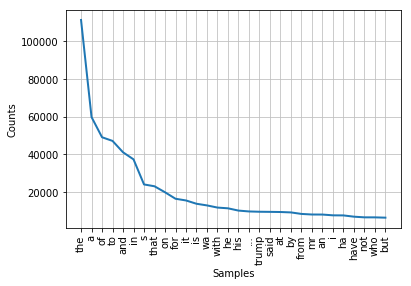

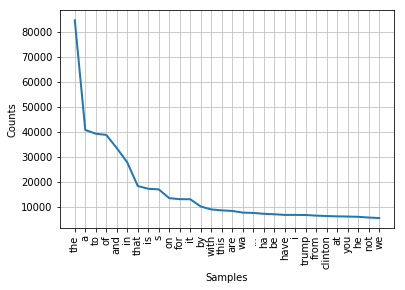

word_dist_true:  54873
word_dist_false:  61431
stop_words:  10496
stop_words:  85503


In [69]:
from nltk.corpus import stopwords
import nltk

def generate_stopwords(data):
    true = data.loc[data['label'] == 0]
    fake = data.loc[data['label'] == 1]
    words = nltk.tokenize.word_tokenize(true['text'].to_string())
    word_dist_true = nltk.FreqDist(words)

    words = nltk.tokenize.word_tokenize(fake['text'].to_string())
    word_dist_fake = nltk.FreqDist(words)

    word_dist_true.plot(30,cumulative=False)
    word_dist_fake.plot(30,cumulative=False)

    mc_true = dict(word_dist_true.most_common(int(len(word_dist_true)*0.3)))
    mc_false = dict(word_dist_fake.most_common(int(len(word_dist_fake)*0.3)))
    mc_true.items()
    stop_words = set()

    for key, value in mc_true.items():
        if key in mc_false:
            difference = abs(value - mc_false[key])/value

            if difference < 0.9:
                stop_words.add(key)

    print("word_dist_true: ", len(word_dist_true))
    print("word_dist_false: ",len(word_dist_fake))
    print("stop_words: ", len(stop_words))

    valuec = pd.Series(' '.join(data['text']).split()).value_counts()
    #print(valuec)
    low_freq_words = valuec[valuec <= 2]
    stop_words.update(low_freq_words.index.tolist())

    nltk_stop_words = stopwords.words('english')
    stop_words.update(nltk_stop_words)
    print("stop_words: ", len(stop_words))
    return stop_words;

stop_words = generate_stopwords(data)

### Remove stop-words from dataframe

In [70]:
import string

display(data.head(1))

data['text'] = data['text'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in stop_words))
test['text'] = test['text'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in stop_words))
data.head(1)

,id,title,author,text,label
0,0,House Dem Aide We Didn t Even See Comey s Letter Until Jason Chaffetz Tweeted It,Darrell Lucus,house dem aide we didn t even see comey s letter until jason chaffetz tweeted it by darrell lucus on october subscribe jason chaffetz on the stump in american fork utah image courtesy michael jolley available under a creative common by license with apology to keith olbermann there is no doubt who the worst person in the world is this week fbi director james comey but according to a house democratic aide it look like we also know who the second worst person is a well it turn out that when comey sent his now infamous letter announcing that the fbi wa looking into email that may be related to hillary clinton s email server the ranking democrat on the relevant committee didn t hear about it from comey they found out via a tweet from one of the republican committee chairman a we now know comey notified the republican chairman and democratic ranking member of the house intelligence judiciary and oversight committee that his agency wa reviewing email it had recently discovered in order to...,1


,id,title,author,text,label
0,0,House Dem Aide We Didn t Even See Comey s Letter Until Jason Chaffetz Tweeted It,Darrell Lucus,dem jason chaffetz darrell lucus october subscribe jason chaffetz courtesy olbermann fbi fbi email related hillary clinton email server via email jason chaffetz fbi dir fbi existence email pertinent reopened jason chaffetz jasoninthehouse october email unrelated anthony weiner sexting chaffetz initiate hillary entire chaffetz fbi roiled dud misreading chaffetz sin shareblue jason chaffetz fbi chaffetz chaffetz courtesy ko chaffetz machine however chaffetz darrell issa bipartisanship notify trample chaffetz ridiculously provo voting chaffetz expedition darrell lucus darrell old charismatic unapologetic ko dem nc darrelllucus click darrell mello yello,1


## Prepare data for classification models

In [71]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

test=test.fillna('')
data=data.fillna('')
#data = data[:3000]
count_vectorizer_t = CountVectorizer(ngram_range=(1, 2))
counts = count_vectorizer_t.fit_transform(data['text'].values)

transformer_tl = TfidfTransformer(smooth_idf=False)
count_vectorizer_tl = CountVectorizer(ngram_range=(1, 2))
counts_logreg = count_vectorizer_tl.fit_transform(data_logreg['text'].values)
tfidf_logreg = transformer_tl.fit_transform(counts_logreg)

count_vectorizer_author = CountVectorizer(ngram_range=(1, 2))
counts_author = count_vectorizer_author.fit_transform(data['author'].values)

count_vectorizer_title = CountVectorizer(ngram_range=(1, 2))
counts_title = count_vectorizer_title.fit_transform(data['title'].values)

## Split data into training and testing partitions

In [99]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X_lstm = tokenizer.texts_to_sequences(data['text'].values)
X_lstm = pad_sequences(X_lstm)

targets = data['label'].values

X_train_lstm, X_test_lstm, X_train_log, X_test_log, X_train_t, X_test_t, X_train_a, X_test_a, X_train, X_test, y_train, y_test = train_test_split(X_lstm, tfidf_logreg, counts_title, counts_author, counts, targets, test_size = 0.001, random_state=15)

print(X_train_log.shape)
print(X_test_log.shape)

print(X_lstm.shape)

20800
(20779, 3244177)
(21, 3244177)
(20800, 1278)


In [77]:
def predict_from_multiple_estimator(estimators, label_encoder, X_list, weights = None):

    # Predict 'soft' voting with probabilities

    pred1 = np.asarray([clf.predict_proba(X) for clf, X in zip(estimators, X_list)])
    pred2 = np.average(pred1, axis=0, weights=weights)
    pred = np.argmax(pred2, axis=1)

    # Convert integer predictions to original labels:
    return label_encoder.inverse_transform(pred)

## Run Models on data and test prediction accuracy

In [78]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
text_clf = MultinomialNB()
text_clf.fit(X_train, y_train)
print('Accuracy of MultinomialNB on test set: {:.5f}'
     .format(text_clf.score(X_test, y_test)))

author_clf = MultinomialNB()
author_clf.fit(X_train_a, y_train)
print('Accuracy of MultinomialNB on test set with authors: {:.5f}'
     .format(author_clf.score(X_test_a, y_test)))

title_clf = MultinomialNB()
title_clf.fit(X_train_t, y_train)
print('Accuracy of MultinomialNB on test set with titles: {:.5f}'
     .format(title_clf.score(X_test_t, y_test)))


grid_params = {
  'alpha': np.linspace(0.5, 1.5, 6),
  'fit_prior': [True, False],
}

gs_text = GridSearchCV(text_clf, grid_params, cv=5, verbose=1)
gs_text.fit(X_train, y_train)

print('Accuracy of GridSearch on text data: {:.5f}'
     .format(gs_text.score(X_test, y_test)))

gs_author = GridSearchCV(author_clf, grid_params, cv=5, verbose=1)
gs_author.fit(X_train_a, y_train)

print('Accuracy with GridSearch on author metadata: {:.5f}'
     .format(gs_author.score(X_test_a, y_test)))

gs_title = GridSearchCV(title_clf, grid_params, cv=5, verbose=1)
gs_title.fit(X_train_t, y_train)

print('Accuracy GridSearch on title metadata: {:.5f}'
     .format(gs_title.score(X_test_t, y_test)))

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train_log, y_train)

print('Accuracy of LogisticRegression test set: {:.3f}'
     .format(logreg.score(X_test_log, y_test)))


adaboost= AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=5)
adaboost.fit(X_train_log, y_train)

print('Accuracy of Adaboost classifier on test set: {:.2f}'
     .format(adaboost.score(X_test_log, y_test)))


label_encoder = LabelEncoder()
label_encoder.fit(y_test)
y_pred = predict_from_multiple_estimator([gs_text, gs_author, gs_title, logreg, adaboost], label_encoder, [X_test, X_test_a, X_test_t, X_test_log, X_test_log])
print('Accuracy on author, text and title clf voting: {:.5f}' ,accuracy_score(y_test, y_pred))

Accuracy of MultinomialNB on test set: 0.85714
Accuracy of MultinomialNB on test set with authors: 0.95238
Accuracy of MultinomialNB on test set with titles: 0.95238
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   23.8s finished


Accuracy of GridSearch on text data: 0.85714
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished


Accuracy with GridSearch on author metadata: 0.95238
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.1s finished


Accuracy GridSearch on title metadata: 0.95238
Accuracy of LogisticRegression test set: 0.952
Accuracy of Adaboost classifier on test set: 1.00
Accuracy on author, text and title clf voting: {:.5f} 0.9523809523809523


C:\Users\jsors\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [103]:
counts_t = count_vectorizer_t.transform(test['text'].values)

counts_author_t = count_vectorizer_author.transform(test['author'].values)

counts_title_t = count_vectorizer_title.transform(test['title'].values)

counts_logreg = count_vectorizer_tl.transform(test_logreg['text'].values)
tfidf_logreg_t = transformer_tl.transform(counts_logreg)

#max_fatures = 2000


#tokenizer = Tokenizer(num_words=max_fatures, split=' ')
#tokenizer.fit_on_texts(test['text'].values)
X_lstm = tokenizer.texts_to_sequences(test['text'].values)
X_lstm = pad_sequences(X_lstm, maxlen = X_train_lstm.shape[1])

#targets_test = test['label'].values
#label_encoder = LabelEncoder()
#label_encoder.fit(targets_test)


print(X_train_lstm.shape)
print(X_test_lstm.shape)
X_lstm.shape

(20779, 1278)
(21, 1278)


(5200, 1278)

In [80]:
#y_pred = predict_from_multiple_estimator([gs_text, gs_author, gs_title, logreg], label_encoder, [X_test, X_test_a, X_test_t, X_test_log])

y_pred = predict_from_multiple_estimator([gs_text, gs_author, gs_title, logreg, adaboost], label_encoder, [counts_t, counts_author_t, counts_title_t, tfidf_logreg_t, tfidf_logreg_t])
pred = pd.DataFrame(y_pred,columns=['label'])
pred['id']=test['id']
pred.groupby('label').count()

pred.to_csv('test_data_results.csv', index=False)

C:\Users\jsors\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9367942513565038 # difference < 0.9

#### Only text
Accuracy of MultinomialNB on test set: 0.950<br>
Accuracy of LogisticRegression test set: 0.966<br>

#### No preprocessing of text
Accuracy of MultinomialNB on test set: 0.772<br>
Accuracy of LogisticRegression test set: 0.973<br>

#### Preprocessing on text
Accuracy of MultinomialNB on test set: 0.92580<br>
Accuracy of LogisticRegression test set: 0.961<br>

#### With smoothing
Accuracy of MultinomialNB on test set: 0.93449<br>
Accuracy of LogisticRegression test set: 0.967<br>

#### All columns no preprocessing
Accuracy of MultinomialNB on test set: 0.69112<br>
Accuracy of LogisticRegression test set: 0.977<br>

#### All columns limited preprocessing
Accuracy of MultinomialNB on test set: 0.82121<br>
Accuracy of LogisticRegression test set: 0.984<br>

#### With stopwords, fillna('') and strip:
Accuracy of MultinomialNB on test set: 0.94115<br>
Accuracy of LogisticRegression test set: 0.972<br>



In [84]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model

#max_fatures = 2000
#tokenizer = Tokenizer(num_words=max_fatures, split=' ')
#tokenizer.fit_on_texts(data['text'].values)
#X = tokenizer.texts_to_sequences(data['text'].values)
#X = pad_sequences(X)

Y_train = to_categorical(y_train, num_classes=2)
Y_test = to_categorical(y_test, num_classes=2)

#X_train_lstm = X_train_lstm[:2000]
#Y_train = Y_train[:2000]
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train_lstm.shape)

(20779, 1278)


In [85]:
X_train_lstm.shape[1]

1278

In [86]:
def create_model():
    #embed_dim = 128
    #lstm_out = 196
    
    embed_dim = 128
    lstm_out = 96
    
    model = Sequential()
    model.add(Embedding(max_fatures, embed_dim, input_length = X_train_lstm.shape[1]))
    model.add(SpatialDropout1D(0.4))
    model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)) # , return_sequences=True
   # model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(2,activation='softmax'))
    model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
    print(model.summary())
    #plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    return model

In [87]:
from keras.wrappers.scikit_learn import KerasClassifier
#model = create_model()
#model.fit(X_train, Y_train, epochs = 7, batch_size=64, verbose = 1)

lstm = KerasClassifier(build_fn=create_model, epochs=14, batch_size=64, verbose=1)
lstm.fit(X_train_lstm, Y_train)
print('Accuracy of LSTM test set: {:.3f}'.format(lstm.score(X_test_lstm, Y_test)))


#score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = 64)
#print("score: %.4f" % (score))
#print("acc: %.4f" % (acc))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1278, 128)         256000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 1278, 128)         0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 96)                86400     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 194       
Total params: 342,594
Trainable params: 342,594
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/14
20779/20779 [==============================] - 1042s 50ms/step - loss: 0.2879 - acc: 0.8762
Epoch 2/14
20779/20779 [==============================] - 1059s 51ms/step - loss: 0.1773 - acc: 0.9331
Epoch 3/14
20779/20779 [==============================] -

In [91]:
print(X_train_lstm.shape)
print(X_test_lstm.shape)
X_lstm.shape

(20779, 1278)
(21, 1278)


(5200, 5530)

In [104]:
#predictions = model.predict(X_test)
#print(predictions)

#y_pred = predict_from_multiple_estimator([gs_text, gs_author, gs_title, logreg, lstm], label_encoder, [X_test, X_test_a, X_test_t, X_test_log, X_test_lstm])
#print('Accuracy on author, text and title clf voting: {:.5f}' ,accuracy_score(y_test, y_pred))

y_pred = predict_from_multiple_estimator([gs_text, gs_author, gs_title, logreg, adaboost, lstm], label_encoder, [counts_t, counts_author_t, counts_title_t, tfidf_logreg_t, tfidf_logreg_t, X_lstm])
pred = pd.DataFrame(y_pred,columns=['label'])
pred['id']=test['id']
pred.groupby('label').count()

pred.to_csv('test_data_results.csv', index=False)

5200/5200 [==============================] - 158s 30ms/step


C:\Users\jsors\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Best accuracy:
0.9650

score: 0.1137<br>
acc: 0.9643


**max_features = 100**<br>
128 lstm 64 lstm<br>
score: 0.2740<br>
acc: 0.8788<br>

128 lstm<br>
score: 0.2619<br>
acc: 0.8788<br>

128 lstm 128 dense<br>
score: 0.3139<br>
acc: 0.8636<br>

256 lstm<br>
score: 0.3054<br>
acc: 0.8545<br>

64 lstm<br>
score: 0.2628<br>
acc: 0.8818<br>

**max_features = 2000**<br>
lstm 64<br>
score: 0.2168
acc: 0.9091

lstm 128<br>
score: 0.2446
acc: 0.9000

lstm 96<br>
score: 0.2763
acc: 0.9152

lstm 96 binary_crossentropy<br>
score: 0.2615
acc: 0.9030

**max_features = 4000**<br>
lstm 96<br>
score: 0.2366
acc: 0.9121

In [39]:
def save_model_to_file(model):
    model_json = model.model.to_json()
    with open("lstm.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.model.save_weights("weights.h5")
    print("Saved model to disk")
    
save_model_to_file(lstm)

Saved model to disk


In [40]:
    def load_model_from_file():

        # load json and create model
        json_file = open('cnn.json', 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        loaded_model = model_from_json(loaded_model_json)
        # load weights into new model
        loaded_model.load_weights("weights.h5")
        print("Loaded model from disk")

        # evaluate loaded model on test data
        loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        return loaded_model


In [41]:
from keras.models import model_from_json

model2 = load_model_from_file()
score,acc = model2.evaluate(X_test, Y_test, verbose = 1, batch_size = 64)
print("score: %.4f" % (score))
print("acc: %.4f" % (acc)) 

ValueError: Dimension 0 in both shapes must be equal, but are 500 and 2000. Shapes are [500,128] and [2000,128]. for 'Assign' (op: 'Assign') with input shapes: [500,128], [2000,128].